# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.949996e+01     7.131662e+00
 * time: 0.0018351078033447266
     1     2.718319e+01     4.219558e+00
 * time: 0.0068759918212890625
     2     1.746199e+01     3.075298e+00
 * time: 0.012014150619506836
     3     1.149222e+01     1.867160e+00
 * time: 0.01637101173400879
     4     9.951918e+00     1.895984e+00
 * time: 0.01985001564025879
     5     9.434836e+00     1.667908e+00
 * time: 0.0234529972076416
     6     8.931487e+00     1.071562e+00
 * time: 0.02726912498474121
     7     8.524855e+00     8.993829e-01
 * time: 0.03107905387878418
     8     8.213066e+00     8.314921e-01
 * time: 0.034693002700805664
     9     8.045637e+00     5.285987e-01
 * time: 0.03845500946044922
    10     8.037167e+00     8.301181e-01
 * time: 0.041329145431518555
    11     7.987978e+00     6.489999e-01
 * time: 0.04464292526245117
    12     7.956057e+00     5.350256e-01
 * time: 0.04781508445739746
    13     7.938131e+00     7.450348e-01
 *

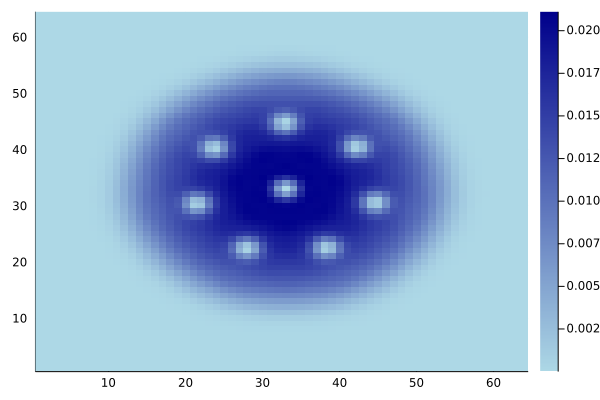

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)